In [1]:
import numpy as np

# 加载深度图
depth_map_path = "000000.npy"
depth = np.load(depth_map_path)

# 打印深度图的基本统计信息
print("--- 深度图基本信息 ---")
print(f"深度图形状 (高度, 宽度): {depth.shape}")
print(f"深度最小值: {depth.min():.4f}")
print(f"深度最大值: {depth.max():.4f}")
print(f"深度中位数: {np.median(depth):.4f}")

# --- 新增功能：获取图像中心的深度值 ---
print("\n--- 图像中心深度值 ---")

# 1. 计算中心像素的坐标
#    depth.shape[0] 是高度 (y轴)
#    depth.shape[1] 是宽度 (x轴)
center_y = depth.shape[0] // 2
center_x = depth.shape[1] // 2

# 2. 获取中心像素的深度值
center_depth = depth[center_y, center_x]

print(f"中心像素坐标 (y, x): ({center_y}, {center_x})")
print(f"中心像素的深度值: {center_depth:.4f}")

# --- (可选) 更稳健的方法：计算中心区域的平均深度 ---
# 为了避免中心恰好是一个异常值，可以取中心周围一个小区域的平均值
print("\n--- (可选) 中心区域平均深度 ---")
# 定义一个以中心为原点的正方形区域的半边长 (例如 5x5 的区域)
region_half_size = 2 
half = region_half_size

# 2. 计算区域的边界 (确保不超出图像范围)
start_y = max(0, center_y - half)
end_y = min(depth.shape[0], center_y + half + 1)
start_x = max(0, center_x - half)
end_x = min(depth.shape[1], center_x + half + 1)

# 3. 提取中心区域并计算平均值
center_region = depth[start_y:end_y, start_x:end_x]
average_center_depth = np.mean(center_region)

print(f"中心区域范围: y[{start_y}:{end_y}], x[{start_x}:{end_x}]")
print(f"中心区域 ({end_y - start_y}x{end_x - start_x}) 的平均深度值: {average_center_depth:.4f}")

--- 深度图基本信息 ---
深度图形状 (高度, 宽度): (480, 640)
深度最小值: 1.9414
深度最大值: 77.8125
深度中位数: 27.9375

--- 图像中心深度值 ---
中心像素坐标 (y, x): (240, 320)
中心像素的深度值: 75.8125

--- (可选) 中心区域平均深度 ---
中心区域范围: y[238:243], x[318:323]
中心区域 (5x5) 的平均深度值: 75.7950


/root/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36716 (\N{CJK UNIFIED IDEOGRAPH-8F6C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25442 (\N{CJK UNIFIED IDEOGRAPH-6362}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


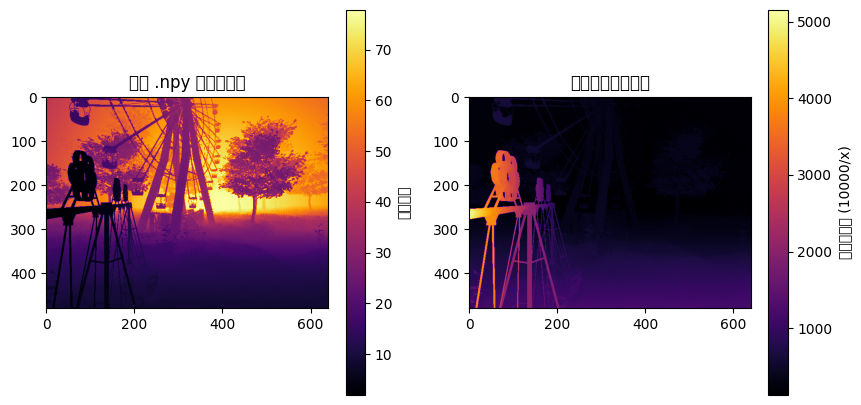

In [5]:
import matplotlib.pyplot as plt

# 直接显示原始数据
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(depth, cmap='inferno')
plt.colorbar(label='原始数值')
plt.title('原始 .npy 数据可视化')

# 显示经过 10000.0 / x 转换后的数据
converted_depth = 10000.0 / (depth + 1e-6) # 加一个小值防止除零
plt.subplot(1, 2, 2)
plt.imshow(converted_depth, cmap='inferno')
plt.colorbar(label='转换后数值 (10000/x)')
plt.title('转换后数据可视化')

plt.show()